In [4]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import linregress

In [5]:
# Import Data (Smaller test data to start with)
#file_path = os.path.join('data-society-us-air-pollution-data', 'uspollution', 'pollution_us_2000_2016.csv')
raw_data = pd.read_csv("pollution_us_2000_2016.csv")

In [6]:
# DataFrame info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [7]:
# Data cleaning (any zeros or NaN)
col_list = ['State', 'Date Local', 'NO2 Mean', 'NO2 1st Max Value', 'O3 Mean', 'O3 1st Max Value', 'SO2 Mean', 'SO2 1st Max Value', 'CO Mean',  'CO 1st Max Value']

trim_data = raw_data[col_list]

# Find any NaN
for col in col_list:
    print(col)
    display(trim_data.loc[trim_data[col].isna()])
    
# Drop Country of Mexico
trim_data = trim_data.loc[trim_data['State'] != 'Country Of Mexico']


State


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


Date Local


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


NO2 Mean


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


NO2 1st Max Value


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


O3 Mean


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


O3 1st Max Value


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


SO2 Mean


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


SO2 1st Max Value


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


CO Mean


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


CO 1st Max Value


,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value


In [8]:
# Create Tidy Dataset 
tidy_data = trim_data.copy()

# Add Year Column
tidy_data['year'] = tidy_data['Date Local'].str[:4]

# Drop 2016 Data due to partial year
tidy_data = tidy_data.loc[tidy_data['year'] != '2016']

# Save Tidy Data
# tidy_data.to_csv('air_pollution_tidy.csv', index = False)


In [9]:
# Read it back in
tidy_data = pd.read_csv('air_pollution_tidy.csv')
tidy_data.tail()

,State,Date Local,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,CO Mean,CO 1st Max Value,year
1722052,Wyoming,2015-12-30,7.047826,18.8,0.036917,0.043,-0.057143,0.2,0.154167,0.200,2015
1722053,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.187500,-0.1,0.103458,0.155,2015
1722054,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.187500,-0.1,0.100000,0.100,2015
1722055,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.175000,-0.1,0.103458,0.155,2015
1722056,Wyoming,2015-12-31,2.445833,8.8,0.038263,0.040,-0.175000,-0.1,0.100000,0.100,2015


In [10]:
# Narrow Down to NO2
data_no2 = tidy_data[['State', 'Date Local', 'year', 'NO2 Mean', 'NO2 1st Max Value']].copy()

data_no2.head()

,State,Date Local,year,NO2 Mean,NO2 1st Max Value
0,Arizona,2000-01-01,2000,19.041667,49.0
1,Arizona,2000-01-01,2000,19.041667,49.0
2,Arizona,2000-01-01,2000,19.041667,49.0
3,Arizona,2000-01-01,2000,19.041667,49.0
4,Arizona,2000-01-02,2000,22.958333,36.0


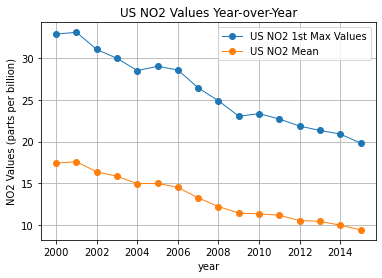

The r-squared is: 0.9722169759247413
The p-value is 2.7097526608987498e-12


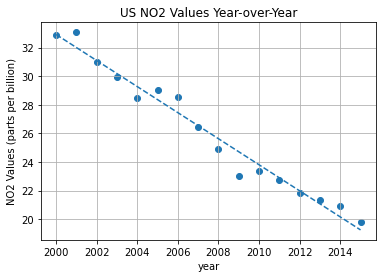

In [11]:
# Year-over-year
# Make a new dataframe focused only on NO2 data
col = ['State', 'Date Local', 'NO2 Mean', 'NO2 1st Max Value', 'year']
no2_df = tidy_data[col]
no2_df.head(15)

# Group data by years
group = no2_df.groupby('year')
mean = group.mean()
mean

# Use .arange to make x values for the following charts/graphs
x_values = np.arange(2000, 2016, 1)
x_values

y_values = group['NO2 1st Max Value'].mean()
y_values_mean = group['NO2 Mean'].mean()

# Line graph for US NO2 1st Max Values and NO2 Mean Values
plt.plot(x_values, y_values, marker = 'o', linewidth = 1, label = 'US NO2 1st Max Values')
plt.plot(x_values, y_values_mean, marker = 'o', linewidth = 1, label = 'US NO2 Mean')
plt.title('US NO2 Values Year-over-Year')
plt.grid()
plt.xlabel('year')
plt.ylabel('NO2 Values (parts per billion)')
plt.legend(loc = 'best')
plt.tight_layout
plt.savefig('./us_no2_plot.png')
plt.show()

# Linear regression analysis for US NO2 1st Max Values
plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "--")
# plt.annotate(line_eq,(2006, 30),fontsize=15,color="red")

plt.title('US NO2 Values Year-over-Year')
plt.grid()
plt.xlabel('year')
plt.ylabel('NO2 Values (parts per billion)')
print(f"The r-squared is: {rvalue**2}")
print(f'The p-value is {pvalue}')
plt.savefig('./us_no2_plot_linregress.png')
plt.show()

In [12]:
# Regional
# Regional differences
region_dict = {
    'Alabama':'South',
    'Alaska':'West',
    'Arizona':'West',
    'Arkansas':'South',
    'California':'West',
    'Colorado':'West',
    'Connecticut':'Northeast',
    'Delaware':'Northeast',
    'District Of Columbia' : 'Northeast',
    'Florida':'South',
    'Georgia':'South',
    'Hawaii':'West',
    'Idaho':'West',
    'Illinois':'Midwest',
    'Indiana':'Midwest',
    'Iowa':'Midwest',
    'Kansas':'Midwest',
    'Kentucky':'South',
    'Louisiana':'South',
    'Maine':'Northeast',
    'Maryland':'South',
    'Massachusetts':'Northeast',
    'Michigan':'Midwest',
    'Minnesota':'Midwest',
    'Mississippi':'South',
    'Missouri':'Midwest',
    'Montana':'West',
    'Nebraska':'Midwest',
    'Nevada':'West',
    'New Hampshire':'Northeast',
    'New Jersey':'Northeast',
    'New Mexico':'West',
    'New York':'Northeast',
    'North Carolina':'South',
    'North Dakota':'Midwest',
    'Ohio':'Midwest',
    'Oklahoma':'South',
    'Oregon':'West',
    'Pennsylvania':'Northeast',
    'Rhode Island':'Northeast',
    'South Carolina':'South',
    'South Dakota':'Midwest',
    'Tennessee':'South',
    'Texas':'South',
    'Utah':'West',
    'Vermont':'Northeast',
    'Virginia':'South',
    'Washington':'West',
    'West Virginia':'South',
    'Wisconsin':'Midwest',
    'Wyoming':'West',
}


In [13]:
# Map Region into the dataframe
data_no2['Region'] = data_no2['State'].map(region_dict)

data_no2.head()

,State,Date Local,year,NO2 Mean,NO2 1st Max Value,Region
0,Arizona,2000-01-01,2000,19.041667,49.0,West
1,Arizona,2000-01-01,2000,19.041667,49.0,West
2,Arizona,2000-01-01,2000,19.041667,49.0,West
3,Arizona,2000-01-01,2000,19.041667,49.0,West
4,Arizona,2000-01-02,2000,22.958333,36.0,West


In [14]:
# Create a DataFrame group by region and then year

grouped_region_yr = data_no2.groupby(['Region', 'year']).mean()

grouped_region_yr = grouped_region_yr.reset_index(drop = False)

grouped_region_yr.head()

# grouped_region_yr.to_clipboard(sep = ',')

,Region,year,NO2 Mean,NO2 1st Max Value
0,Midwest,2000,17.589403,33.140399
1,Midwest,2001,17.011671,32.445508
2,Midwest,2002,15.402753,30.286323
3,Midwest,2003,15.678108,30.333333
4,Midwest,2004,14.031407,27.767409


In [15]:
# Visualization
northeast = grouped_region_yr.loc[grouped_region_yr['Region'] == 'Northeast'].copy()
midwest = grouped_region_yr.loc[grouped_region_yr['Region'] == 'Midwest'].copy()
south = grouped_region_yr.loc[grouped_region_yr['Region'] == 'South'].copy()
west = grouped_region_yr.loc[grouped_region_yr['Region'] == 'West'].copy()

# west.plot(kind = 'line', x = 'year', y = 'NO2 Mean')
# northeast.plot(kind = 'line', x = 'year', y = 'NO2 Mean', color = 'darkorange')

# plt.show()

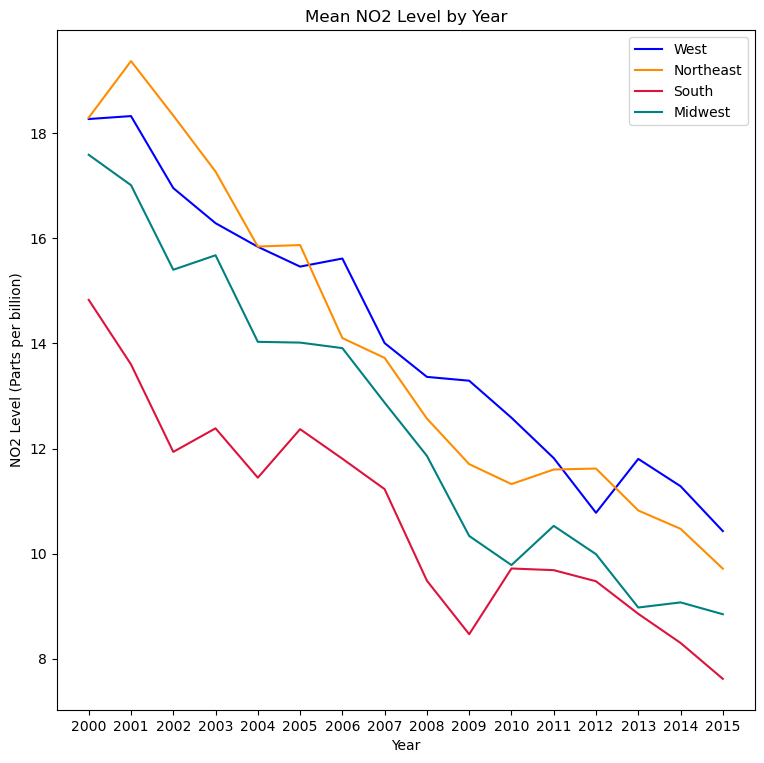

In [16]:
plt.figure(figsize = (9, 9), dpi = 100)

x = west['year']
y = west['NO2 Mean']

plt.plot(x, y, color = 'b', label = 'West')

x1 = northeast['year']
y1 = northeast['NO2 Mean']

plt.plot(x1, y1, color = 'darkorange', label = 'Northeast')

x2 = south['year']
y2 = south['NO2 Mean']

plt.plot(x2, y2, color = 'crimson', label = 'South')

x3 = midwest['year']
y3 = midwest['NO2 Mean']

plt.plot(x3, y3, color = 'teal', label = 'Midwest')

plt.title('Mean NO2 Level by Year')
plt.xlabel('Year')
plt.ylabel('NO2 Level (Parts per billion)')
plt.xticks(ticks = x)

plt.legend();

In [77]:
# collect NO2 mean from each region and drop the orginal index
northeast_no2mean=northeast["NO2 Mean"].reset_index(drop=True)
midwest_no2mean=midwest["NO2 Mean"].reset_index(drop=True)
south_no2mean=south["NO2 Mean"].reset_index(drop=True)
west_no2mean=west["NO2 Mean"].reset_index(drop=True)

In [78]:
## check the assumptions for ANOVA (cite: https://reneshbedre.github.io/blog/anova.html)
# Shapiro-Wilk test (null hypotheis --data is drawn from normal distribution) p<0.05 reject the null hypothesis

# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# Bartlett’s test (Null hypothesis: samples from populations have equal variances) p<0.05 reject the null hypothesis
import scipy.stats as stats
w, pvalue = stats.bartlett(northeast_no2mean, midwest_no2mean, south_no2mean, south_no2mean)
print(w, pvalue)

0.9710824489593506 3.4325459141726355e-11
81.18147790061013 1.7123350954373835e-17


F_onewayResult(statistic=32.50302944693241, pvalue=8.862916184249413e-20)

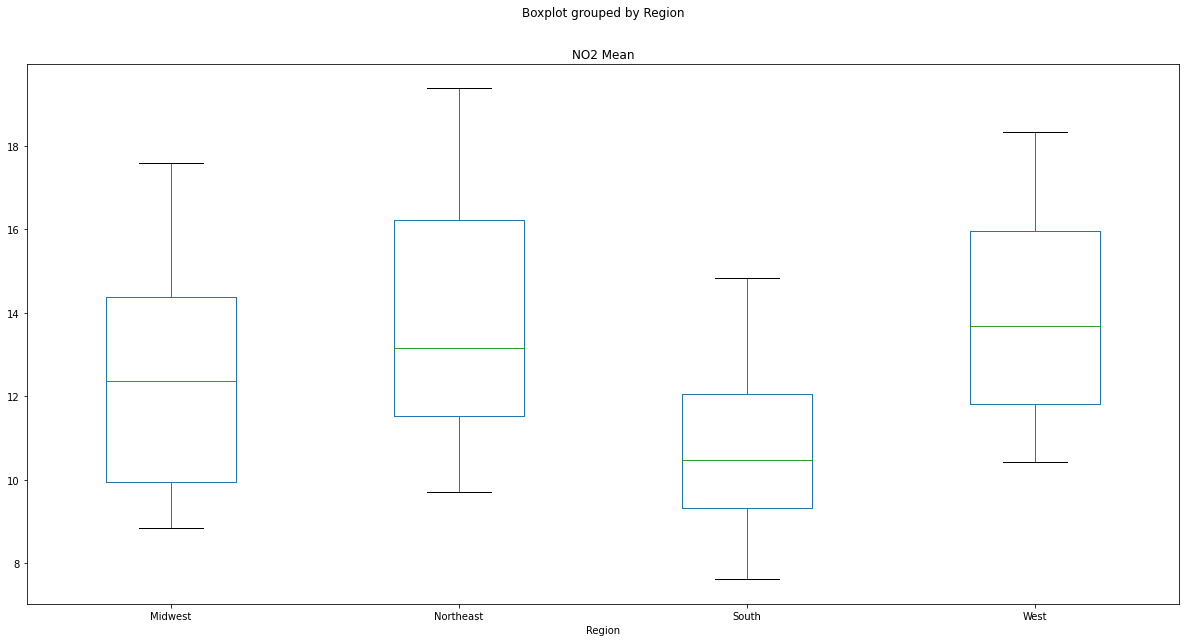

In [79]:
# I do not think we can perform one-way ANOVA here, because the it did not fit the normality and homogenicty variance assumptioins)
#from scipy import stats
#grouped_region_yr.boxplot("NO2 Mean", by="Region", figsize=(20, 10), grid=False)
#stats.f_oneway(northeast["NO2 Mean"], midwest["NO2 Mean"], south["NO2 Mean"], west["NO2 Mean"])

In [76]:
# # just to show how to use do Tukey test, but our dataset did not meet the assumptions for one-way ANOVA
# # zip above data into a list
# list_of_tuples = list(zip(northeast_no2mean, midwest_no2mean, south_no2mean, west_no2mean)) 

# # Converting lists of tuples into pandas Dataframe
# NO2_mean_region = pd.DataFrame(list_of_tuples, columns = ['Northeast', 'Midwest','South','West'])
# NO2_mean_region

# # get ANOVA table as R like output
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# # reshape the d dataframe suitable for statsmodels package 
# d_melt = pd.melt(NO2_mean_region.reset_index(), id_vars=['index'], value_vars=['Northeast', 'Midwest','South','West'])
# # replace column names
# d_melt.columns = ['index', 'Region', 'Mean_NO2']
# d_melt.head()
# # perform multiple pairwise comparison (Tukey HSD)
# m_comp = pairwise_tukeyhsd(endog=d_melt['Mean_NO2'], groups=d_melt['Region'], alpha=0.05)
# print(m_comp)

0.9710824489593506 3.4325459141726355e-11
81.18147790061013 1.7123350954373835e-17
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
  Midwest Northeast   2.7551  0.001  1.5806  3.9297   True
  Midwest     South  -1.4754  0.007   -2.65 -0.3009   True
  Midwest      West   1.5369 0.0044  0.3623  2.7114   True
Northeast     South  -4.2306  0.001 -5.4052  -3.056   True
Northeast      West  -1.2183 0.0387 -2.3929 -0.0437   True
    South      West   3.0123  0.001  1.8377  4.1869   True
----------------------------------------------------------


In [80]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(northeast_no2mean, midwest_no2mean, equal_var=False)

Ttest_indResult(statistic=5.707134902561668, pvalue=2.6945773000790913e-08)

In [81]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(northeast_no2mean, south_no2mean, equal_var=False)

Ttest_indResult(statistic=8.640070134972966, pvalue=2.7577358126904945e-16)

In [82]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(northeast_no2mean, west_no2mean, equal_var=False)

Ttest_indResult(statistic=2.262539092415285, pvalue=0.02424655905406459)

In [83]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(midwest_no2mean, south_no2mean, equal_var=False)

Ttest_indResult(statistic=4.151950943880369, pvalue=4.071034264173572e-05)

In [84]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(midwest_no2mean, west_no2mean, equal_var=False)

Ttest_indResult(statistic=-3.658447211505495, pvalue=0.00029325701539204577)

In [85]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(south_no2mean, west_no2mean, equal_var=False)

Ttest_indResult(statistic=-7.038294511879622, pvalue=1.009126518355953e-11)

In [18]:
# let's try monthly

data_no2['month'] = data_no2['Date Local'].str[5:7]

data_no2['yearmonth'] = data_no2['year'].astype(str) + data_no2['month'].astype(str)

data_no2.head()

,State,Date Local,year,NO2 Mean,NO2 1st Max Value,Region,month,yearmonth
0,Arizona,2000-01-01,2000,19.041667,49.0,West,01,200001
1,Arizona,2000-01-01,2000,19.041667,49.0,West,01,200001
2,Arizona,2000-01-01,2000,19.041667,49.0,West,01,200001
3,Arizona,2000-01-01,2000,19.041667,49.0,West,01,200001
4,Arizona,2000-01-02,2000,22.958333,36.0,West,01,200001


In [19]:
# groupby region, year, month

gby_region_yrmo = data_no2.groupby(['Region', 'yearmonth']).mean()

gby_region_yrmo = gby_region_yrmo.reset_index( drop = False)

In [20]:
gby_region_yrmo.to_clipboard(sep = ',')

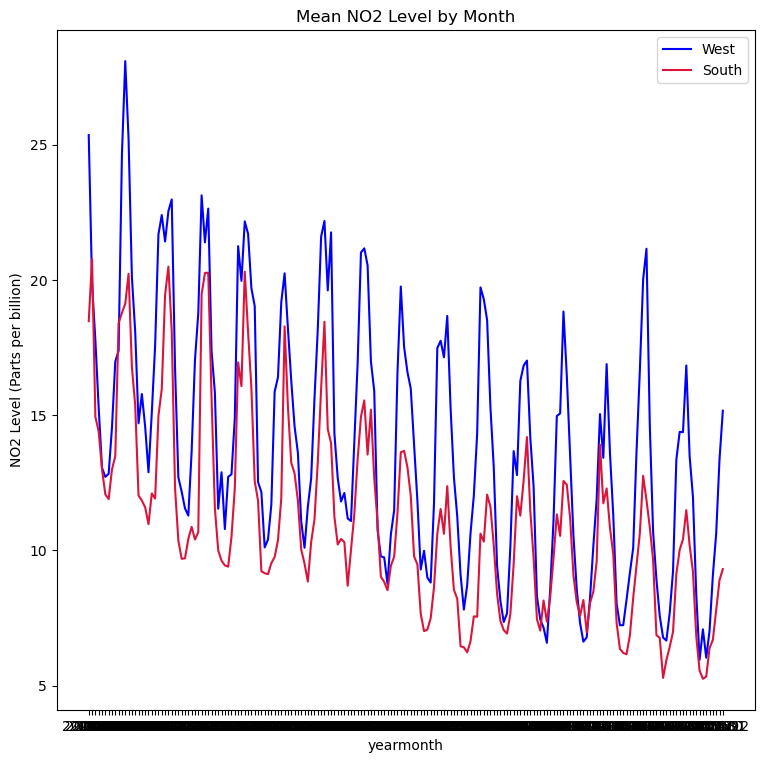

In [21]:
northeast = gby_region_yrmo.loc[gby_region_yrmo['Region'] == 'Northeast'].copy()
midwest = gby_region_yrmo.loc[gby_region_yrmo['Region'] == 'Midwest'].copy()
south = gby_region_yrmo.loc[gby_region_yrmo['Region'] == 'South'].copy()
west = gby_region_yrmo.loc[gby_region_yrmo['Region'] == 'West'].copy()

# west.plot(kind = 'line', x = 'year', y = 'NO2 Mean')
# northeast.plot(kind = 'line', x = 'year', y = 'NO2 Mean', color = 'darkorange')

plt.figure(figsize = (9, 9), dpi = 100)

x = west['yearmonth']
y = west['NO2 Mean']

plt.plot(x, y, color = 'b', label = 'West')

# x1 = northeast['yearmonth']
# y1 = northeast['NO2 Mean']

# plt.plot(x1, y1, color = 'darkorange', label = 'Northeast')

x2 = south['yearmonth']
y2 = south['NO2 Mean']

plt.plot(x2, y2, color = 'crimson', label = 'South')

# x3 = midwest['yearmonth']
# y3 = midwest['NO2 Mean']

# plt.plot(x3, y3, color = 'teal', label = 'Midwest')

plt.title('Mean NO2 Level by Month')
plt.xlabel('yearmonth')
plt.ylabel('NO2 Level (Parts per billion)')
plt.xticks(ticks = x)

plt.legend();
plt.show()